In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Desktop/Data/adult.csv" , na_values = ["#NAME?"])

In [3]:
df = df.sample(frac = 0.1, random_state = 1)
print(df.shape)

(4884, 15)


In [4]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
391,31,Private,224234,HS-grad,9,Never-married,Transport-moving,Own-child,Black,Male,0,0,40,United-States,<=50K
1899,25,Private,149486,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Male,0,0,40,United-States,<=50K
24506,36,Self-emp-not-inc,343721,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,30,?,>50K
32816,26,?,131777,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,0,2002,40,United-States,<=50K
47892,30,Local-gov,44566,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K


In [5]:
print(df['income'].value_counts())

<=50K    3688
>50K     1196
Name: income, dtype: int64


In [6]:
df['income'] = [0 if x == "<=50K" else 1 for x in df['income']]

In [7]:
df["income"].unique()

array([0, 1], dtype=int64)

In [8]:
X = df.drop('income' , 1)
y = df.income

In [9]:
X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
391,31,Private,224234,HS-grad,9,Never-married,Transport-moving,Own-child,Black,Male,0,0,40,United-States
1899,25,Private,149486,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Male,0,0,40,United-States
24506,36,Self-emp-not-inc,343721,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,30,?
32816,26,?,131777,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,0,2002,40,United-States
47892,30,Local-gov,44566,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States


In [10]:
y.head()

391      0
1899     0
24506    1
32816    0
47892    0
Name: income, dtype: int64

In [11]:
X["education"].unique()

array(['HS-grad', 'Doctorate', 'Bachelors', 'Some-college', '12th',
       '7th-8th', 'Prof-school', '9th', 'Assoc-acdm', '11th', '10th',
       'Masters', 'Assoc-voc', '1st-4th', 'Preschool', '5th-6th'],
      dtype=object)

In [12]:
print(pd.get_dummies(X["education"]).head())

       10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  Assoc-acdm  \
391       0     0     0        0        0        0    0           0   
1899      0     0     0        0        0        0    0           0   
24506     0     0     0        0        0        0    0           0   
32816     0     0     0        0        0        0    0           0   
47892     0     0     0        0        0        0    0           0   

       Assoc-voc  Bachelors  Doctorate  HS-grad  Masters  Preschool  \
391            0          0          0        1        0          0   
1899           0          0          0        1        0          0   
24506          0          0          1        0        0          0   
32816          0          1          0        0        0          0   
47892          0          1          0        0        0          0   

       Prof-school  Some-college  
391              0             0  
1899             0             0  
24506            0             0  
32816 

In [13]:
for col_name in X.columns:
    if X[col_name].dtypes == "object":
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has '{unique_cat}' unique categories".format(
        col_name=col_name, unique_cat=unique_cat))

Feature 'workclass' has '9' unique categories
Feature 'education' has '16' unique categories
Feature 'marital-status' has '7' unique categories
Feature 'occupation' has '15' unique categories
Feature 'relationship' has '6' unique categories
Feature 'race' has '5' unique categories
Feature 'gender' has '2' unique categories
Feature 'native-country' has '40' unique categories


In [14]:
print(X['native-country'].value_counts().sort_values(ascending = False).head(10))

United-States    4400
?                  82
Mexico             77
Philippines        28
Vietnam            23
Puerto-Rico        22
Germany            20
India              19
South              16
Cuba               16
Name: native-country, dtype: int64


In [15]:
X['native-country'] = ['United-States' if x == 'United-States' else 'other' for x in X['native-country']]
print(X['native-country'].value_counts().sort_values(ascending = False))

United-States    4400
other             484
Name: native-country, dtype: int64


In [16]:
todummy_list = ['workclass','education', 'marital-status','occupation', 'relationship',
               'race', 'gender','native-country']

In [17]:
def dummy_df (df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na = False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis = 1)
    return df
    

In [18]:
X = dummy_df (X, todummy_list)
X.head(10)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_United-States,native-country_other
391,31,224234,9,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1899,25,149486,9,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
24506,36,343721,16,0,0,30,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
32816,26,131777,13,0,2002,40,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
47892,30,44566,13,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
21561,39,141420,10,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
808,44,165745,9,0,0,38,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
19596,68,75913,8,0,0,30,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
931,35,165799,13,0,0,50,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
29559,64,231619,9,0,0,21,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0


In [19]:
X.isnull().sum().sort_values(ascending = False).head()

native-country_other    0
education_Bachelors     0
education_1st-4th       0
education_5th-6th       0
education_7th-8th       0
dtype: int64

In [20]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = "NaN", strategy = "median", axis = 0)
imp.fit(X)
X = pd.DataFrame(data=imp.transform(X), columns=X.columns)

C:\Users\Mohammad Reza Jalali\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [21]:
def find_outliere_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    IQR = q3 - q1
    floor = q1 - 1.5*IQR
    ceiling = q3 + 1.5*IQR
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

In [22]:
tukey_indices, tukey_values = find_outliere_tukey(X["age"])
print(np.sort(tukey_values))

[79. 79. 80. 80. 81. 81. 82. 82. 83. 83. 83. 84. 84. 87. 88. 90. 90. 90.
 90. 90. 90. 90.]


In [23]:
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

def find_outliers_kde(x):
    x_scaled = scale(list(map(float, x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw = "scott", fft = True)
    pred = kde.evaluate(x_scaled)
    
    n = sum(pred < 0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]
    
    return outlier_ind, outlier_value

In [24]:
kde_indices, kde_values = find_outliers_kde(X["age"])
print((np.sort(kde_values)))

[70. 70. 70. 70. 70. 70. 70. 70. 70. 70. 70. 70. 71. 71. 71. 71. 71. 71.
 71. 71. 71. 71. 71. 71. 71. 71. 71. 72. 72. 72. 72. 72. 72. 72. 72. 72.
 72. 73. 73. 73. 73. 73. 73. 73. 73. 73. 74. 74. 74. 74. 74. 74. 74. 74.
 74. 74. 74. 74. 74. 74. 75. 75. 75. 75. 75. 75. 76. 76. 76. 76. 76. 77.
 77. 77. 77. 78. 78. 78. 78. 78. 79. 79. 80. 80. 81. 81. 82. 82. 83. 83.
 83. 84. 84. 87. 88. 90. 90. 90. 90. 90. 90. 90.]


In [25]:
%matplotlib inline 
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x , color = "gray", alpha = 0.5)
    plt.title("Histogram of '{var_name}'".format(var_name = x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

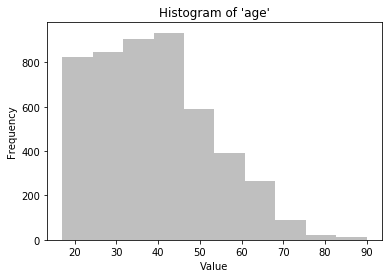

In [26]:
plot_histogram(X["age"])

In [27]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    poly = PolynomialFeatures(interaction_only= True, include_bias = False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indicies], axis = 1)
    
    return df

In [28]:
X = add_interactions(X)
print(X.head(5))

    age    fnlwgt  educational-num  capital-gain  capital-loss  \
0  31.0  224234.0              9.0           0.0           0.0   
1  25.0  149486.0              9.0           0.0           0.0   
2  36.0  343721.0             16.0           0.0           0.0   
3  26.0  131777.0             13.0           0.0        2002.0   
4  30.0   44566.0             13.0           0.0           0.0   

   hours-per-week  workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0            40.0          0.0                    0.0                  0.0   
1            40.0          0.0                    0.0                  0.0   
2            30.0          0.0                    0.0                  0.0   
3            40.0          1.0                    0.0                  0.0   
4            40.0          0.0                    0.0                  1.0   

   workclass_Never-worked  ...  race_Other_native-country_United-States  \
0                     0.0  ...                             

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
X_pca = pd.DataFrame(pca.fit_transform(X))
print(X_pca.head(5))

              0             1             2             3             4  \
0 -2.146057e+08 -1.832180e+07  9.979275e+05 -1.155051e+06 -1.730581e+04   
1 -2.146074e+08 -1.836483e+07 -3.436808e+06 -1.421330e+06 -4.971371e+04   
2 -2.146037e+08 -1.827160e+07  6.171617e+06  1.746768e+06  2.829638e+06   
3 -2.150101e+08  2.454336e+08 -6.666458e+06 -1.089142e+06  3.627441e+05   
4 -2.146092e+08 -1.841145e+07 -8.197412e+06 -2.651443e+05 -6.776835e+04   

              5              6              7              8              9  
0 -22870.830771   93326.625468  223017.589161    2980.496320  281512.840814  
1 -34446.536192   41820.722746   86608.568006   21823.891322  183192.147957  
2  69896.260471   22636.716360  -64117.975969 -458684.345049    9670.754052  
3 -18909.275166 -154236.856564  -62966.097551  -37044.898983   61586.399750  
4 -45979.906109  -97203.366515  -57502.705173  -32111.614899   17192.332557  


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state = 1)

In [31]:
print(df.shape)
print(X.shape)

(4884, 15)
(4884, 1730)


In [32]:
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k = 20)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices = True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

C:\Users\Mohammad Reza Jalali\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  40  107  173  238  274  278  293  346  418  484  503  532  554  657
  670  680  701  723  743  773  776  808  825  842  899  925  927  940
  960  981  997 1039 1045 1066 1110 1112 1116 1178 1181 1197 1199 1205
 1213 1214 1216 1230 1234 1314 1476 1477 1478 1479 1531 1571 1644] are constant.
  UserWarning)
C:\Users\Mohammad Reza Jalali\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [33]:
colnames_selected

['educational-num',
 'marital-status_Married-civ-spouse',
 'relationship_Husband',
 'age_educational-num',
 'age_marital-status_Married-civ-spouse',
 'age_relationship_Husband',
 'fnlwgt_marital-status_Married-civ-spouse',
 'fnlwgt_relationship_Husband',
 'educational-num_hours-per-week',
 'educational-num_marital-status_Married-civ-spouse',
 'educational-num_relationship_Husband',
 'hours-per-week_marital-status_Married-civ-spouse',
 'hours-per-week_relationship_Husband',
 'marital-status_Married-civ-spouse_relationship_Husband',
 'marital-status_Married-civ-spouse_race_White',
 'marital-status_Married-civ-spouse_gender_Male',
 'marital-status_Married-civ-spouse_native-country_United-States',
 'relationship_Husband_race_White',
 'relationship_Husband_gender_Male',
 'relationship_Husband_native-country_United-States']

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def find_model_perf(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_hat)
   
    return auc

In [35]:
auc_processed = find_model_perf(X_train_selected, y_train, X_test_selected, y_test)
print(auc_processed)

0.8171290157180997


C:\Users\Mohammad Reza Jalali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [37]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# The function to measure the quality of a split
criterion = ['gini' , 'entropy']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [74]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = 
                               random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_selected, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [75]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'criterion': 'entropy',
 'bootstrap': True}

In [76]:
rf_predict = rf_random.predict(X_test_selected)

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [78]:
best_random = rf_random.best_estimator_
rf_cv_score = cross_val_score(best_random, X_test_selected, y_test, cv=10, scoring='roc_auc')

In [79]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rf_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rf_predict))
print('\n')
print("=== accuracy_score ===")
print(accuracy_score(y_test, rf_predict))
print('\n')
print("=== All AUC Scores ===")
print(rf_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rf_cv_score.mean())

=== Confusion Matrix ===
[[1018   91]
 [ 180  177]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1109
           1       0.66      0.50      0.57       357

    accuracy                           0.82      1466
   macro avg       0.76      0.71      0.72      1466
weighted avg       0.80      0.82      0.81      1466



=== accuracy_score ===
0.815143246930423


=== All AUC Scores ===
[0.83383383 0.86011011 0.90590591 0.87012012 0.88038038 0.83683684
 0.81956957 0.85379665 0.82715573 0.82831169]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8516020826020826


In [80]:
best_random

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_selected, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [43]:
y_pred = svclassifier.predict(X_test_selected)

In [44]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[1025   84]
 [ 222  135]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1109
           1       0.62      0.38      0.47       357

    accuracy                           0.79      1466
   macro avg       0.72      0.65      0.67      1466
weighted avg       0.77      0.79      0.77      1466

0.791268758526603


In [48]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train_selected, y_train)

C:\Users\Mohammad Reza Jalali\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [46]:
y_pred = svclassifier.predict(X_test_selected)

In [47]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[1109    0]
 [ 357    0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1109
           1       0.00      0.00      0.00       357

    accuracy                           0.76      1466
   macro avg       0.38      0.50      0.43      1466
weighted avg       0.57      0.76      0.65      1466

0.7564802182810368


C:\Users\Mohammad Reza Jalali\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
from sklearn.linear_model import LogisticRegression
lrclassifier = LogisticRegression()
lrclassifier.fit(X_train_selected, y_train)

C:\Users\Mohammad Reza Jalali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
y_pred = lrclassifier.predict(X_test_selected)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))